# 프로젝트 목차   

## 1. num_words 실험 1)None,  2)5000,  3)3000, 4)4000, 5)8000   

### (1)data load      
### (2) data decode      
### (3) vectorize      
### (4) 8개 모델 테스트 및 평가 ( NB, CNV, LR, SVM, DT, RF, GBT, Ensemble)   
   
   
## 2. 딥러닝 모델과 비교

In [3]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model


plt.style.use("fivethirtyeight")

# 1. num_words 실험 

## 1) num_words = None

### (1) data load

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### (2) data decode

In [3]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

### (3) vectorize

In [4]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

### (4) 8개 모델 테스트 및 평가

###  NB

In [5]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, mod.predict(tfidfv_test)))

정확도: 0.5997328584149599
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.79      0.21      0.33       105
           2       0.00      0.00      0.00        20
           3       0.72      0.92      0.81       813
           4       0.45      0.96      0.61       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        30
          11       0.80      0.29      0.42        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.75      0.18      0.29        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### CNB

In [6]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, cb.predict(tfidfv_test)))

정확도: 0.7649154051647373
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.63      0.88      0.73       105
           2       0.91      0.50      0.65        20
           3       0.87      0.91      0.89       813
           4       0.75      0.93      0.83       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.43      0.08      0.13        38
           9       0.81      0.88      0.85        25
          10       0.96      0.73      0.83        30
          11       0.55      0.67      0.61        83
          12       0.00      0.00      0.00        13
          13       0.62      0.54      0.58        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.67      0.77      0.71        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### LR

In [7]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lr.predict(tfidfv_test)))

정확도: 0.813446126447017
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.80      0.77       105
           2       0.70      0.70      0.70        20
           3       0.93      0.93      0.93       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.93      1.00      0.97        14
           7       1.00      0.67      0.80         3
           8       0.68      0.71      0.69        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.66      0.73      0.70        83
          12       0.57      0.31      0.40        13
          13       0.61      0.62      0.61        37
          14       0.67      1.00      0.80         2
          15       0.71      0.56      0.63         9
          16       0.71      0.77      0.74        99
    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

### SVM

In [8]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

정확도: 0.7773820124666073
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.69      0.70      0.69       105
           2       0.64      0.70      0.67        20
           3       0.91      0.91      0.91       813
           4       0.81      0.85      0.83       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       0.50      0.33      0.40         3
           8       0.63      0.71      0.67        38
           9       1.00      0.84      0.91        25
          10       0.89      0.83      0.86        30
          11       0.63      0.75      0.69        83
          12       0.27      0.23      0.25        13
          13       0.56      0.51      0.54        37
          14       0.00      0.00      0.00         2
          15       0.33      0.11      0.17         9
          16       0.61      0.72      0.66        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### DT

In [9]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, tree.predict(tfidfv_test)))

정확도: 0.6211041852181657
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.69      0.43      0.53       105
           2       0.75      0.45      0.56        20
           3       0.94      0.85      0.89       813
           4       0.40      0.89      0.55       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.89      0.80      0.84        30
          11       0.58      0.60      0.59        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.61      0.83      0.70        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### RF

In [10]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, forest.predict(tfidfv_test)))

정확도: 0.6544968833481746
              precision    recall  f1-score   support

           0       0.25      0.58      0.35        12
           1       0.35      0.60      0.44       105
           2       0.32      0.40      0.36        20
           3       0.82      0.89      0.85       813
           4       0.62      0.84      0.71       474
           5       0.00      0.00      0.00         5
           6       0.67      0.43      0.52        14
           7       0.50      0.33      0.40         3
           8       0.51      0.47      0.49        38
           9       1.00      0.28      0.44        25
          10       0.46      0.20      0.28        30
          11       0.56      0.64      0.60        83
          12       0.40      0.15      0.22        13
          13       0.33      0.16      0.22        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.46      0.52        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### GBT

In [11]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, grbt.predict(tfidfv_test)))

정확도: 0.7702582368655387
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        12
           1       0.81      0.71      0.76       105
           2       0.58      0.70      0.64        20
           3       0.87      0.91      0.89       813
           4       0.78      0.86      0.82       474
           5       1.00      0.20      0.33         5
           6       0.77      0.71      0.74        14
           7       1.00      0.33      0.50         3
           8       0.60      0.63      0.62        38
           9       0.91      0.80      0.85        25
          10       0.79      0.77      0.78        30
          11       0.61      0.65      0.63        83
          12       0.50      0.46      0.48        13
          13       0.48      0.32      0.39        37
          14       0.00      0.00      0.00         2
          15       0.25      0.11      0.15         9
          16       0.72      0.71      0.71        99
   

### Ensemble

In [12]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

정확도: 0.8187889581478184
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.77      0.79       105
           2       0.67      0.80      0.73        20
           3       0.93      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.67      0.71      0.69        83
          12       0.60      0.46      0.52        13
          13       0.69      0.65      0.67        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16       0.73      0.76      0.74        99
   

# 2) num_words = 5000

# data load

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


# data decode

In [3]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# vectorize

In [4]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

# 8개 모델 테스트 및 평가

###  NB

In [5]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, mod.predict(tfidfv_test)))

정확도: 0.6731967943009796
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.50      0.80      0.62       105
           2       0.00      0.00      0.00        20
           3       0.86      0.89      0.87       813
           4       0.59      0.95      0.73       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.28      0.44        25
          10       0.00      0.00      0.00        30
          11       0.48      0.73      0.58        83
          12       0.00      0.00      0.00        13
          13       1.00      0.14      0.24        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.66      0.62        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### CNB

In [6]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, cb.predict(tfidfv_test)))

정확도: 0.7707034728406055
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.57      0.21      0.31        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.54      0.76      0.63        83
          12       0.00      0.00      0.00        13
          13       0.69      0.59      0.64        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.67      0.79      0.72        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### LR

In [7]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lr.predict(tfidfv_test)))

정확도: 0.8058771148708815
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.80      0.79       105
           2       0.74      0.85      0.79        20
           3       0.91      0.93      0.92       813
           4       0.81      0.87      0.84       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.64      0.74      0.68        38
           9       0.81      0.88      0.85        25
          10       0.93      0.87      0.90        30
          11       0.64      0.73      0.68        83
          12       0.57      0.31      0.40        13
          13       0.64      0.62      0.63        37
          14       0.50      0.50      0.50         2
          15       0.83      0.56      0.67         9
          16       0.67      0.73      0.70        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

### SVM

In [8]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

정확도: 0.7666963490650045
              precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.72      0.71      0.72       105
           2       0.74      0.70      0.72        20
           3       0.90      0.91      0.90       813
           4       0.79      0.83      0.81       474
           5       0.00      0.00      0.00         5
           6       0.80      0.86      0.83        14
           7       0.50      0.33      0.40         3
           8       0.56      0.66      0.60        38
           9       0.73      0.76      0.75        25
          10       0.74      0.77      0.75        30
          11       0.60      0.73      0.66        83
          12       0.23      0.23      0.23        13
          13       0.59      0.54      0.56        37
          14       0.33      0.50      0.40         2
          15       0.50      0.22      0.31         9
          16       0.65      0.71      0.68        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### DT

In [9]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, tree.predict(tfidfv_test)))

정확도: 0.6179875333926982
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.40      0.52       105
           2       0.60      0.45      0.51        20
           3       0.94      0.84      0.89       813
           4       0.39      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.57      0.73        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.62      0.48      0.54        83
          12       0.17      0.08      0.11        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.82      0.69        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### RF

In [10]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, forest.predict(tfidfv_test)))

정확도: 0.701246660730187
              precision    recall  f1-score   support

           0       0.28      0.42      0.33        12
           1       0.42      0.78      0.55       105
           2       0.44      0.35      0.39        20
           3       0.84      0.90      0.87       813
           4       0.68      0.84      0.75       474
           5       0.00      0.00      0.00         5
           6       0.86      0.43      0.57        14
           7       1.00      0.33      0.50         3
           8       0.59      0.53      0.56        38
           9       0.71      0.40      0.51        25
          10       0.89      0.53      0.67        30
          11       0.57      0.69      0.62        83
          12       0.33      0.15      0.21        13
          13       0.46      0.32      0.38        37
          14       0.00      0.00      0.00         2
          15       1.00      0.11      0.20         9
          16       0.70      0.67      0.68        99
    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### GBT

In [11]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, grbt.predict(tfidfv_test)))

정확도: 0.767586821015138
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.80      0.68      0.73       105
           2       0.70      0.70      0.70        20
           3       0.90      0.90      0.90       813
           4       0.76      0.83      0.79       474
           5       0.14      0.20      0.17         5
           6       0.93      0.93      0.93        14
           7       0.50      0.33      0.40         3
           8       0.64      0.66      0.65        38
           9       0.91      0.84      0.87        25
          10       0.87      0.87      0.87        30
          11       0.62      0.66      0.64        83
          12       0.46      0.46      0.46        13
          13       0.55      0.43      0.48        37
          14       0.08      0.50      0.14         2
          15       0.33      0.22      0.27         9
          16       0.72      0.77      0.75        99
    

### Ensemble

In [12]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

정확도: 0.8161175422974176
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.80      0.77      0.79       105
           2       0.71      0.85      0.77        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.33      0.20      0.25         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.81      0.84      0.82        25
          10       0.93      0.90      0.92        30
          11       0.67      0.70      0.68        83
          12       0.60      0.46      0.52        13
          13       0.68      0.62      0.65        37
          14       0.12      0.50      0.20         2
          15       0.67      0.44      0.53         9
          16       0.74      0.74      0.74        99
   

# 3) num_words = 3000

# data load

In [13]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=3000, test_split=0.2)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


# data decode

In [14]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# vectorize

In [15]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

# 8개 모델 테스트 및 평가

###  NB

In [16]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, mod.predict(tfidfv_test)))

정확도: 0.6874443455031166
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.49      0.82      0.61       105
           2       0.00      0.00      0.00        20
           3       0.88      0.88      0.88       813
           4       0.64      0.95      0.76       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.48      0.65        25
          10       1.00      0.10      0.18        30
          11       0.45      0.76      0.56        83
          12       0.00      0.00      0.00        13
          13       0.70      0.19      0.30        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.56      0.76      0.64        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### CNB

In [17]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, cb.predict(tfidfv_test)))

정확도: 0.7644701691896705
              precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.64      0.85      0.73       105
           2       0.83      0.50      0.62        20
           3       0.92      0.89      0.90       813
           4       0.74      0.93      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.64      0.18      0.29        38
           9       0.82      0.92      0.87        25
          10       0.93      0.83      0.88        30
          11       0.52      0.78      0.62        83
          12       0.00      0.00      0.00        13
          13       0.68      0.62      0.65        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.64      0.78      0.70        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### LR

In [18]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lr.predict(tfidfv_test)))

정확도: 0.794746215494212
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.75      0.76       105
           2       0.68      0.85      0.76        20
           3       0.91      0.92      0.91       813
           4       0.78      0.85      0.82       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.65      0.74      0.69        38
           9       0.81      0.84      0.82        25
          10       0.89      0.83      0.86        30
          11       0.60      0.69      0.64        83
          12       0.57      0.31      0.40        13
          13       0.59      0.65      0.62        37
          14       0.50      0.50      0.50         2
          15       0.83      0.56      0.67         9
          16       0.67      0.72      0.69        99
    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### SVM

In [19]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

정확도: 0.7502226179875334
              precision    recall  f1-score   support

           0       0.78      0.58      0.67        12
           1       0.64      0.71      0.68       105
           2       0.75      0.75      0.75        20
           3       0.88      0.88      0.88       813
           4       0.78      0.81      0.80       474
           5       0.00      0.00      0.00         5
           6       0.88      1.00      0.93        14
           7       1.00      0.33      0.50         3
           8       0.59      0.63      0.61        38
           9       0.76      0.76      0.76        25
          10       0.82      0.77      0.79        30
          11       0.61      0.69      0.64        83
          12       0.55      0.46      0.50        13
          13       0.62      0.62      0.62        37
          14       1.00      0.50      0.67         2
          15       0.83      0.56      0.67         9
          16       0.60      0.71      0.65        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### DT

In [20]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, tree.predict(tfidfv_test)))

정확도: 0.6260017809439002
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.39      0.51       105
           2       0.75      0.45      0.56        20
           3       0.94      0.84      0.89       813
           4       0.40      0.90      0.56       474
           5       0.00      0.00      0.00         5
           6       0.90      0.64      0.75        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.87      0.87      0.87        30
          11       0.59      0.52      0.55        83
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.84      0.70        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### RF

In [21]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, forest.predict(tfidfv_test)))

정확도: 0.6856634016028496
              precision    recall  f1-score   support

           0       0.30      0.58      0.40        12
           1       0.44      0.72      0.55       105
           2       0.12      0.10      0.11        20
           3       0.85      0.91      0.88       813
           4       0.66      0.83      0.73       474
           5       0.00      0.00      0.00         5
           6       0.67      0.57      0.62        14
           7       0.33      0.33      0.33         3
           8       0.54      0.53      0.53        38
           9       0.69      0.44      0.54        25
          10       0.72      0.43      0.54        30
          11       0.54      0.59      0.56        83
          12       0.50      0.15      0.24        13
          13       0.41      0.32      0.36        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.61      0.52      0.56        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### GBT

In [22]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, grbt.predict(tfidfv_test)))

정확도: 0.7756010685663401
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.76      0.70      0.73       105
           2       0.67      0.70      0.68        20
           3       0.89      0.92      0.91       813
           4       0.77      0.84      0.80       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       0.20      0.33      0.25         3
           8       0.62      0.66      0.64        38
           9       0.90      0.76      0.83        25
          10       0.86      0.80      0.83        30
          11       0.66      0.69      0.67        83
          12       0.21      0.23      0.22        13
          13       0.54      0.41      0.46        37
          14       0.50      1.00      0.67         2
          15       0.50      0.22      0.31         9
          16       0.71      0.71      0.71        99
   

### Ensemble

In [23]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

정확도: 0.8103294746215495
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.77      0.78      0.77       105
           2       0.73      0.80      0.76        20
           3       0.92      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.68      0.74      0.71        38
           9       0.80      0.80      0.80        25
          10       0.90      0.87      0.88        30
          11       0.65      0.70      0.67        83
          12       0.50      0.38      0.43        13
          13       0.62      0.62      0.62        37
          14       0.67      1.00      0.80         2
          15       0.67      0.44      0.53         9
          16       0.70      0.73      0.71        99
   

# 4) num_words = 4000

# data load

In [24]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=4000, test_split=0.2)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


# data decode

In [25]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# vectorize

In [26]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

# 8개 모델 테스트 및 평가

###  NB

In [27]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, mod.predict(tfidfv_test)))

정확도: 0.6838824577025824
              precision    recall  f1-score   support

           0       1.00      0.25      0.40        12
           1       0.51      0.82      0.63       105
           2       0.00      0.00      0.00        20
           3       0.86      0.88      0.87       813
           4       0.62      0.95      0.75       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.44      0.61        25
          10       1.00      0.07      0.12        30
          11       0.45      0.76      0.57        83
          12       0.00      0.00      0.00        13
          13       1.00      0.16      0.28        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.76      0.66        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### CNB

In [28]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, cb.predict(tfidfv_test)))

정확도: 0.7689225289403384
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.63      0.86      0.73       105
           2       0.91      0.50      0.65        20
           3       0.92      0.89      0.90       813
           4       0.74      0.92      0.82       474
           5       0.00      0.00      0.00         5
           6       0.86      0.86      0.86        14
           7       1.00      0.67      0.80         3
           8       0.64      0.24      0.35        38
           9       0.82      0.92      0.87        25
          10       0.96      0.80      0.87        30
          11       0.52      0.77      0.62        83
          12       0.00      0.00      0.00        13
          13       0.63      0.59      0.61        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.65      0.79      0.71        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### LR

In [29]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lr.predict(tfidfv_test)))

정확도: 0.7978628673196795
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.78      0.78      0.78       105
           2       0.70      0.80      0.74        20
           3       0.91      0.93      0.92       813
           4       0.79      0.86      0.82       474
           5       0.00      0.00      0.00         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.66      0.71      0.68        38
           9       0.82      0.92      0.87        25
          10       0.93      0.87      0.90        30
          11       0.63      0.71      0.67        83
          12       0.57      0.31      0.40        13
          13       0.62      0.65      0.63        37
          14       0.67      1.00      0.80         2
          15       0.83      0.56      0.67         9
          16       0.67      0.71      0.69        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedM

### SVM

In [30]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

정확도: 0.767586821015138
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.66      0.68      0.67       105
           2       0.68      0.65      0.67        20
           3       0.89      0.90      0.90       813
           4       0.79      0.83      0.81       474
           5       0.33      0.20      0.25         5
           6       0.75      0.86      0.80        14
           7       1.00      0.33      0.50         3
           8       0.58      0.66      0.62        38
           9       0.75      0.72      0.73        25
          10       0.89      0.80      0.84        30
          11       0.60      0.71      0.65        83
          12       0.45      0.38      0.42        13
          13       0.51      0.57      0.54        37
          14       1.00      0.50      0.67         2
          15       0.67      0.44      0.53         9
          16       0.62      0.69      0.65        99
    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### DT

In [31]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, tree.predict(tfidfv_test)))

정확도: 0.6202137132680321
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.71      0.40      0.51       105
           2       0.50      0.35      0.41        20
           3       0.94      0.85      0.89       813
           4       0.40      0.91      0.55       474
           5       0.00      0.00      0.00         5
           6       1.00      0.64      0.78        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.79      0.88      0.83        25
          10       0.87      0.87      0.87        30
          11       0.66      0.48      0.56        83
          12       0.17      0.08      0.11        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.60      0.80      0.68        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### RF

In [32]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, forest.predict(tfidfv_test)))

정확도: 0.6878895814781835
              precision    recall  f1-score   support

           0       0.40      0.50      0.44        12
           1       0.36      0.70      0.47       105
           2       0.32      0.30      0.31        20
           3       0.84      0.90      0.87       813
           4       0.69      0.85      0.76       474
           5       0.00      0.00      0.00         5
           6       0.82      0.64      0.72        14
           7       0.25      0.33      0.29         3
           8       0.51      0.53      0.52        38
           9       0.53      0.36      0.43        25
          10       0.59      0.33      0.43        30
          11       0.59      0.61      0.60        83
          12       0.33      0.15      0.21        13
          13       0.30      0.19      0.23        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.59      0.58      0.58        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### GBT

In [33]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, grbt.predict(tfidfv_test)))

정확도: 0.7671415850400712
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.76      0.68      0.71       105
           2       0.70      0.70      0.70        20
           3       0.89      0.91      0.90       813
           4       0.77      0.84      0.80       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.68      0.68      0.68        38
           9       0.83      0.80      0.82        25
          10       0.80      0.80      0.80        30
          11       0.64      0.67      0.65        83
          12       0.35      0.46      0.40        13
          13       0.56      0.41      0.47        37
          14       0.20      0.50      0.29         2
          15       0.40      0.22      0.29         9
          16       0.69      0.73      0.71        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### Ensemble

In [34]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

정확도: 0.8130008904719501
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.79      0.80      0.80       105
           2       0.68      0.85      0.76        20
           3       0.92      0.94      0.93       813
           4       0.83      0.87      0.85       474
           5       0.00      0.00      0.00         5
           6       0.93      0.93      0.93        14
           7       0.67      0.67      0.67         3
           8       0.72      0.68      0.70        38
           9       0.75      0.84      0.79        25
          10       0.90      0.90      0.90        30
          11       0.66      0.70      0.68        83
          12       0.43      0.46      0.44        13
          13       0.66      0.62      0.64        37
          14       0.33      0.50      0.40         2
          15       0.57      0.44      0.50         9
          16       0.72      0.74      0.73        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# 5) num_words = 8000

# data load

In [35]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=8000, test_split=0.2)

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


# data decode

In [36]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

index_to_word = {index + 3 : word for word, index in word_index.items()}

# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token

decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded

decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded

# vectorize

In [37]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)

tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)

x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

# 8개 모델 테스트 및 평가

###  NB

In [38]:
mod = MultinomialNB()
mod.fit(tfidfv, y_train)
predicted = mod.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, mod.predict(tfidfv_test)))

정확도: 0.6625111308993766
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.59      0.75      0.66       105
           2       0.00      0.00      0.00        20
           3       0.82      0.90      0.86       813
           4       0.54      0.96      0.69       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.16      0.28        25
          10       0.00      0.00      0.00        30
          11       0.58      0.67      0.63        83
          12       0.00      0.00      0.00        13
          13       1.00      0.05      0.10        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.66      0.59      0.62        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### CNB

In [39]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, cb.predict(tfidfv_test)))

정확도: 0.7707034728406055
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.64      0.87      0.74       105
           2       0.91      0.50      0.65        20
           3       0.91      0.89      0.90       813
           4       0.74      0.93      0.82       474
           5       0.00      0.00      0.00         5
           6       0.87      0.93      0.90        14
           7       1.00      0.67      0.80         3
           8       0.64      0.24      0.35        38
           9       0.79      0.92      0.85        25
          10       0.96      0.80      0.87        30
          11       0.55      0.73      0.63        83
          12       0.00      0.00      0.00        13
          13       0.63      0.59      0.61        37
          14       0.00      0.00      0.00         2
          15       0.50      0.11      0.18         9
          16       0.66      0.78      0.72        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### LR

In [40]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lr.predict(tfidfv_test)))

정확도: 0.8098842386464826
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.75      0.78      0.77       105
           2       0.74      0.85      0.79        20
           3       0.92      0.94      0.93       813
           4       0.81      0.87      0.84       474
           5       1.00      0.20      0.33         5
           6       0.92      0.86      0.89        14
           7       1.00      0.67      0.80         3
           8       0.69      0.71      0.70        38
           9       0.81      0.88      0.85        25
          10       0.93      0.90      0.92        30
          11       0.67      0.73      0.70        83
          12       0.57      0.31      0.40        13
          13       0.61      0.62      0.61        37
          14       0.67      1.00      0.80         2
          15       0.83      0.56      0.67         9
          16       0.68      0.74      0.71        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### SVM

In [41]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, lsvc.predict(tfidfv_test)))

정확도: 0.776046304541407
              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.69      0.70      0.70       105
           2       0.70      0.70      0.70        20
           3       0.91      0.92      0.91       813
           4       0.81      0.83      0.82       474
           5       0.67      0.40      0.50         5
           6       0.92      0.86      0.89        14
           7       1.00      0.33      0.50         3
           8       0.59      0.68      0.63        38
           9       0.78      0.84      0.81        25
          10       0.92      0.80      0.86        30
          11       0.62      0.72      0.67        83
          12       0.36      0.31      0.33        13
          13       0.62      0.57      0.59        37
          14       0.14      0.50      0.22         2
          15       0.71      0.56      0.63         9
          16       0.64      0.71      0.67        99
    

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### DT

In [42]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, tree.predict(tfidfv_test)))

정확도: 0.6206589492430988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.41      0.52       105
           2       0.75      0.45      0.56        20
           3       0.93      0.84      0.88       813
           4       0.40      0.91      0.56       474
           5       0.00      0.00      0.00         5
           6       0.90      0.64      0.75        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.88      0.88      0.88        25
          10       0.86      0.83      0.85        30
          11       0.66      0.45      0.53        83
          12       0.14      0.08      0.10        13
          13       0.00      0.00      0.00        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.61      0.84      0.71        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### RF

In [43]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, forest.predict(tfidfv_test)))

정확도: 0.6669634906500446
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        12
           1       0.36      0.66      0.46       105
           2       0.21      0.20      0.21        20
           3       0.82      0.90      0.86       813
           4       0.65      0.83      0.73       474
           5       0.00      0.00      0.00         5
           6       0.50      0.43      0.46        14
           7       0.20      0.33      0.25         3
           8       0.54      0.55      0.55        38
           9       0.38      0.20      0.26        25
          10       0.73      0.27      0.39        30
          11       0.48      0.54      0.51        83
          12       0.33      0.15      0.21        13
          13       0.38      0.24      0.30        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.61      0.49      0.55        99
   

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

### GBT

In [44]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교
print(classification_report(y_test, grbt.predict(tfidfv_test)))

정확도: 0.7644701691896705
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.77      0.67      0.71       105
           2       0.68      0.75      0.71        20
           3       0.88      0.90      0.89       813
           4       0.75      0.85      0.80       474
           5       0.50      0.20      0.29         5
           6       0.77      0.71      0.74        14
           7       1.00      0.33      0.50         3
           8       0.61      0.66      0.63        38
           9       0.91      0.80      0.85        25
          10       0.90      0.87      0.88        30
          11       0.64      0.69      0.66        83
          12       0.29      0.31      0.30        13
          13       0.65      0.46      0.54        37
          14       0.10      0.50      0.17         2
          15       0.33      0.11      0.17         9
          16       0.74      0.76      0.75        99
   

### Ensemble

In [45]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

print(classification_report(y_test, voting_classifier.predict(tfidfv_test)))

정확도: 0.813446126447017
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.77      0.74      0.76       105
           2       0.69      0.90      0.78        20
           3       0.93      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       0.50      0.20      0.29         5
           6       0.93      0.93      0.93        14
           7       1.00      0.33      0.50         3
           8       0.70      0.68      0.69        38
           9       0.81      0.84      0.82        25
          10       0.90      0.90      0.90        30
          11       0.65      0.70      0.67        83
          12       0.44      0.31      0.36        13
          13       0.66      0.68      0.67        37
          14       0.14      0.50      0.22         2
          15       0.67      0.44      0.53         9
          16       0.75      0.75      0.75        99
    

## 최종 결과 표
| num\model | NB | CNB | LR | SVM | DT | RF | GBT | Ensemble |
|:------:|------|------|------|------|------|------|------|-------|
| None  | 0.59 | 0.76 | 0.81 | 0.77 | 0.62 | 0.65 | 0.77 | 0.818 |
| 10000 | 0.65 | 0.77 | 0.80 | 0.78 | 0.62 | 0.67 | 0.76 | 0.811 |
| 8000 | 0.66 | 0.77 | 0.80 | 0.77 | 0.62 | 0.66 | 0.76 | 0.813 |
| 5000 | 0.67 | 0.77 | 0.80 | 0.76 | 0.61 | 0.70 | 0.76 | 0.816 |
| 4000 | 0.68 | 0.76 | 0.79 | 0.76 | 0.62 | 0.68 | 0.76 | 0.813 | 
| 3000 | 0.68 | 0.76 | 0.79 | 0.75 | 0.62 | 0.68 | 0.77 | 0.810 |

## 각 모델에서 num_words와 accuracy의 관계 비교
NB 는 num_words가 클수록 accuracy는 낮아짐      
RF 는 num_words가 클수록 accuracy는 낮아짐      
   
   
   
LR 은 num_words가 클수록 accuracy는 높아짐      
SVM은 num_words가 클수록 accuracy는 높아짐 (None에선 다시 떨어짐)     
   
   
    
    
DT 는 num_words 크기와 accuracy사이 관계 없음   
CNB는 num_words 크기와 accuracy사이 관계 없음   
GBT는 num_words 크기와 accuracy사이 관계 없음   
Ensemble은 num_words 크기와 accuracy사이 관계 없음   

# 분석   
사실 num_words에 따라 accuracy가 크게 차이나는 모델들은 아래와 같다.   
   
   
   
LR 로지스틱 회귀는 2% 내외,   
SVM 서포트 벡터 머신은 3% 내외,   
RF 랜덤 포레스트는 5% 내외,   
NB 나이브 베이즈 분류기는 9% 내외의 차이를 보였다.   
   
   
가장 성능이 좋은 건 Ensemble로 num_words개수에 크게 영향 받지 않고 모두 81% 대 accuracy를 보였다.   
   
ensemble 중 accuracy가 그나마 제일 높은 건 num_words가 none일 때였다.   
### num_words = None, Ensemble(CNB, LR, CBT) accuracy = 0.818

# 2. 딥러닝 모델과 결과 비교

In [16]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 5000, test_split=0.2)

리뷰의 최대 길이 : 2376
리뷰의 평균 길이 : 145.5398574927633


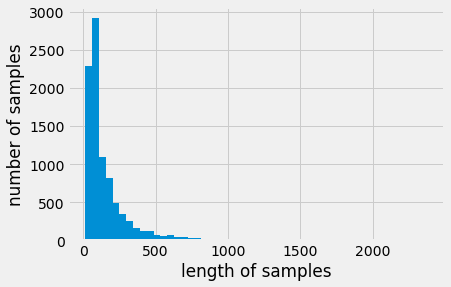

In [17]:
# train 데이터셋 내 문장 길이 분포  
print('리뷰의 최대 길이 :',max(len(i) for i in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

리뷰의 최대 길이 : 1032
리뷰의 평균 길이 : 147.66117542297417


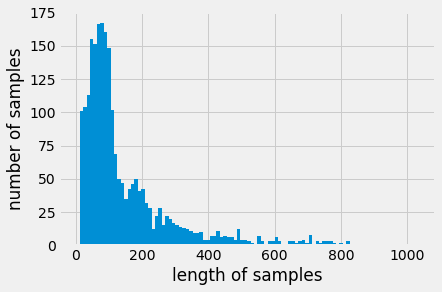

In [18]:
# train 데이터셋 내 문장 길이 분포  
print('리뷰의 최대 길이 :',max(len(i) for i in x_test))
print('리뷰의 평균 길이 :',sum(map(len, x_test))/len(x_test))
plt.hist([len(s) for s in x_test], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [19]:
maxlen = 200
X_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, padding='post', maxlen = maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, padding='post', maxlen = maxlen)

In [20]:
y_train[0]

3

In [21]:
y_train = to_categorical(y_train) # 훈련용 뉴스 기사 레이블의 원-핫 인코딩
y_test = to_categorical(y_test) # 테스트용 뉴스 기사 레이블의 원-핫 인코딩

In [22]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [69]:
#  LSTM으로 학습
model = keras.Sequential([
    keras.layers.Embedding(5000, 120),# (Size of the vocabulary, Dimension of the dense embedding)
    keras.layers.LSTM(120),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(46, activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# model compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [70]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping, model_checkpoint], 
                   batch_size=32 ,validation_split=0.2
                   )

Epoch 1/100
223/225 [============================>.] - ETA: 0s - loss: 2.4737 - acc: 0.3526
Epoch 00001: val_acc improved from -inf to 0.35782, saving model to best_model.h5
225/225 [==============================] - 4s 18ms/step - loss: 2.4751 - acc: 0.3523 - val_loss: 2.3581 - val_acc: 0.3578
Epoch 2/100
224/225 [============================>.] - ETA: 0s - loss: 2.3302 - acc: 0.3701
Epoch 00002: val_acc improved from 0.35782 to 0.41291, saving model to best_model.h5
225/225 [==============================] - 4s 17ms/step - loss: 2.3297 - acc: 0.3701 - val_loss: 2.1676 - val_acc: 0.4129
Epoch 3/100
223/225 [============================>.] - ETA: 0s - loss: 2.1588 - acc: 0.3908
Epoch 00003: val_acc did not improve from 0.41291
225/225 [==============================] - 4s 18ms/step - loss: 2.1567 - acc: 0.3901 - val_loss: 2.1421 - val_acc: 0.3934
Epoch 4/100
223/225 [============================>.] - ETA: 0s - loss: 2.0731 - acc: 0.4026
Epoch 00004: val_acc did not improve from 0.41291

In [71]:
history_dict = history.history

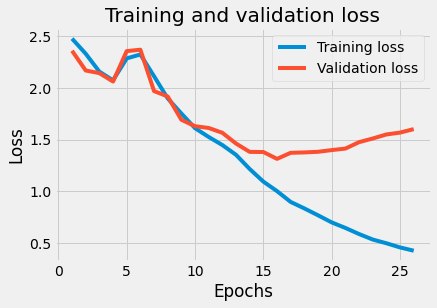

In [72]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs ,loss, label='Training loss')
plt.plot(epochs ,val_loss,label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1])) 

71/71 [==============================] - 0s 7ms/step - loss: 1.6513 - acc: 0.7044

 테스트 정확도: 0.7044


# 딥러닝 모델의 test accuracy가 10% 가량 더 낮다. 왜?   
### 데이터 개수가 적어서 인듯 (훈련 셋만 9000개 미만)

# 회고   
### 1. (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= None, test_split=0.2) 이렇게 데이터 로드 시 num_words를 None으로 줬을 때,     keras.layers.Embedding(None, 100)  임베딩 레이어의 vocab_size는 None으로 줄 수가 없는 건가?  None으로 주면 계속 에러나서  (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words= 5000, test_split=0.2), keras.layers.Embedding(5000, 100) 전부 5000으로 맞춰야했다.   
   
      
### 2. 로이터 뉴스데이터를 로드했을 때 y_train을 곧바로 모델 입력값으로 넣으면 에러가 났다. from tensorflow.keras.utils import to_categorical 이렇게 to_categorical 이란 모듈을 import해준 다음 y_train = to_categorical(y_train) 이렇게 레이블을 원핫인코딩으로 바꿔줘야 모델이 훈련이 됐다. 왜?   
   
   
### 3. 모델 파라미터들, keras.layers.Embedding(5000, 120)에서 임베딩 벡터의 차원 수 120, keras.layers.LSTM(120)에서 lstm 레이어의 유닛수 120,  keras.layers.Dense(120, activation='relu')에서 덴스 레이어의 유닛수 120,  이 파라미터들을 너무 작게 하면 (16, 8, 8) 언더피팅?이 된다. (훈련 정확도가 40%를 못넘는다) 이들 파라미터는 뭘 보고 맞추는 거지? 그냥 내가 했던 것처럼 무식하게 여러 번 조합해서 넣어봐야 되나? 


